# MOwNiT - Równania różniczkowe zwyczajne
### autor: dr Katarzyna Rycerz

## ODE metodą Rungego-Kutty w pythonie


W pythonie metoda Rungego-Kutty znajduje się w bibliotece `scipy.integrate` jako jedna z metod uniwersalnego solvera `solve_ivp(fun, t_span, y0, method='RK45', t_eval=None)`, gdzie
- `fun` - funkcja zmiennych $(t,y)$ reprezentująca prawą stronę układu
- `t_span` - przedział czasu (zmiennej $t$)
- `y0` - warunki początkowe
- `method` - metoda rozwiązywania
- `t_eval` - punkty czasu, w których ma być obliczane i pamiętane rozwiązanie

Rozwiązać rówanie Lorenza:
$$\left\{\begin{array}{l}
x'=10 y-10 x\\
y'=-xz+28x-y\\
z'=xy-\frac{8}{3}z\end{array}\right.$$
z warunkami początkowymi $x(0)=0$, $y(0)=1$, $z(0)=0$. 

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

def func(t, r):
    x, y, z = r
    fx = 10 * (y - x)
    fy = 28 * x - y - x * z
    fz = x * y - (8.0 / 3.0) * z
    return np.array([fx, fy, fz], float)


r0 = [0, 1, 0]
sol = solve_ivp(func, [0, 50], r0, method='RK45',t_eval=np.linspace(0,50,5000))

sol.y

array([[ 0.00000000e+00,  9.51410265e-02,  1.82830885e-01, ...,
        -9.78230412e+00, -8.94941117e+00, -8.12923123e+00],
       [ 1.00000000e+00,  1.00353835e+00,  1.03240573e+00, ...,
        -1.43589746e+00, -6.62222160e-01, -3.97573631e-02],
       [ 0.00000000e+00,  4.79193939e-04,  1.86779517e-03, ...,
         3.66090502e+01,  3.57272357e+01,  3.48074680e+01]],
      shape=(3, 5000))

Naszkicować motyla Lorenza, tzn. wykres rozwiązania.

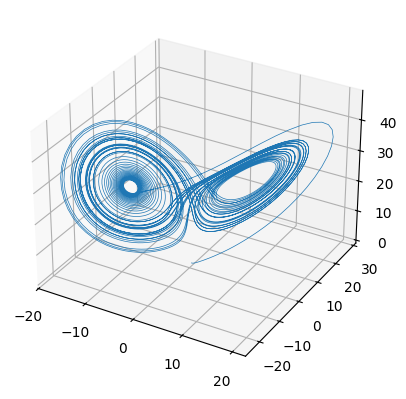

In [2]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2],linewidth=0.5)


plt.show()


### Wprowadzenie do wszystkich zadań
    
* zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* należy napisać własną implementację metody Eulera 
* porównać ją z metodą  Rungego-Kutty dla zadanego na zajęciach równania. 
* **Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.**

#### Punkty:

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Animacja poza standardowymi wykresami $f(t)$ (1 pkt)

## Zadanie 1.

Zasymuluj wahadło matematyczne rozwiązując numerycznie równanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

#### Rozwiązanie:

$$ x''(t) = -\frac{g}{l} \sin x = f(t, x, x') $$

Wprowadźmy nowe zmienne pomocnicze:

$$ x_1 = x $$ 
$$ x_2 = x' $$ 

Otrzymujemy wówczas następujący układ równań:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = f(t, x_1, x_2)
\end{cases}
$$

Dla równania wahadła:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = -\frac{g}{l} \sin x_1
\end{cases}
$$

In [3]:
def mathemathical_oscilator(t, r, g, l):
    x1, x2 = r
    dx1dt = x2
    dx2dt = -g / l * np.sin(x1)
    return np.array([dx1dt, dx2dt], float)

In [4]:
r0 = [0, 8]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 5000)
g = 10
l = 0.3

sol = solve_ivp(mathemathical_oscilator, t_span, r0, method = 'RK45', t_eval = t_eval, args = (g, l))

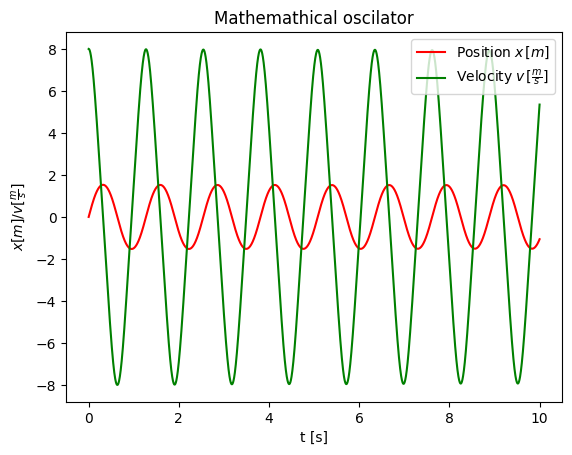

In [5]:
plt.title("Mathemathical oscilator")
plt.plot(sol.t, sol.y[0], c='red', label=r'$ \text{Position} \; x\, [m]$')
plt.plot(sol.t, sol.y[1], c='green', label = r'$ \text{Velocity} \; v \,[\frac{m}{s}] $')
plt.xlabel("t [s]")
plt.ylabel(r"$x [m] / v[\frac{m}{s}]$")
plt.legend()
plt.show()

## Zadanie 2.

Zasymuluj układ grawitacyjny: gwiazda i przylatujące
ciało niebieskie z pewną (zadawana przez użytkownika) prędkością 
początkową.  Więcej informacji w ksiązce v1_web.pdf dołączonej do tego zadania.

Równanie grawitacyjne w postaci różniczkowej:

$$ \frac{d^2}{dt^2}\textbf{r} = -G \frac{M_1 + M_2}{r^3} \textbf{r} $$

Niech:

$$ -G \frac{M_1 + M_2}{r^3} = k $$

Gdzie:

$$ r = \|\textbf{r}\| = \sqrt{x^2 + y^2 + z^2} $$

Sprowadza się ono do następującej formy:

$$ \frac{d^2}{dt^2}\textbf{r} = (x''(t), y''(t), z''(t)) $$

Gdzie:

$$
x'(t) = v_x\\
y'(t) = v_y\\
z'(t) = v_z\\
$$

$$
x''(t) = v_x' = -G \frac{M_1 + M_2}{r^3} x = k \cdot x\\
y''(t) = v_y' = -G \frac{M_1 + M_2}{r^3} y = k \cdot y\\
z''(t) = v_z' = -G \frac{M_1 + M_2}{r^3} z = k \cdot z\\
$$

<!-- $$
\frac{d^2}{dt^2}\textbf{r} = -G \frac{M_1 + M_2}{r^3} \textbf{r}
$$ -->

In [6]:
def gravity(t, r, G, M1, M2):
    x, y, z, vx, vy, vz = r
    r_norm = np.linalg.norm(r[:3])
    # r_norm = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    k = -G * (M1 + M2) / (r_norm ** 3)
    dxdt = vx
    dydt = vy
    dzdt = vz
    dx2dt = k * x
    dy2dt = k * y
    dz2dt = k * z
    return np.array([dxdt, dydt, dzdt, dx2dt, dy2dt, dz2dt], float)

In [7]:
r0 = [1, 0, 1, 0.7, 0.2, 0.2]
t_span = (0, 5)
t_eval = np.linspace(*t_span, 5000)
G = 1
M1 = 0.5
M2 = 0.5

sol = solve_ivp(gravity, t_span, r0, method = 'RK45', t_eval = t_eval, args = (G, M1, M2))

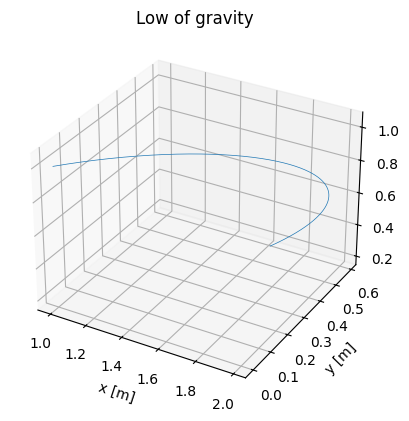

In [8]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_title("Low of gravity")
ax.plot(sol.y[0], sol.y[1], sol.y[2],linewidth=0.5)
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
plt.show()

## Zadanie 3.

Zasymuluj model drapieżnik - ofiara (równania Lotki-Volterry) 

- $x(t)$- populacja drapieżników

- $y(t)$ -populacja ofiar 

- $a$ - współczynnik śmiertelności drapieżników z powodu braku ofiar 

- $b$ - współczynnik narodzin ofiar, gdy nie ma drapieżników

- $c$ - efektywność z jaką drapieżnik wykorzystuje  energię pozyskaną ze zjedzenia ofiar  $0.0<c=<1.0$ 

- $d$ - efektywność uśmiercania ofiar przez drapieżniki

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

In [9]:
def predator_prey(t, r, a, b, c, d):
    x, y = r
    dxdt = -a * x + c * d * x * y
    dydt = b * y - d * x * y
    return np.array([dxdt, dydt], float)

In [10]:
t0, tn = 0, 10
t_span = [t0, tn]
r0 = [20, 100]
a, b, c, d = 2, 10, 0.3, 0.2
t_eval = np.linspace(t0, tn, 200)

sol = solve_ivp(predator_prey, t_span, r0, method = 'RK45', t_eval = t_eval, args = (a, b, c, d))

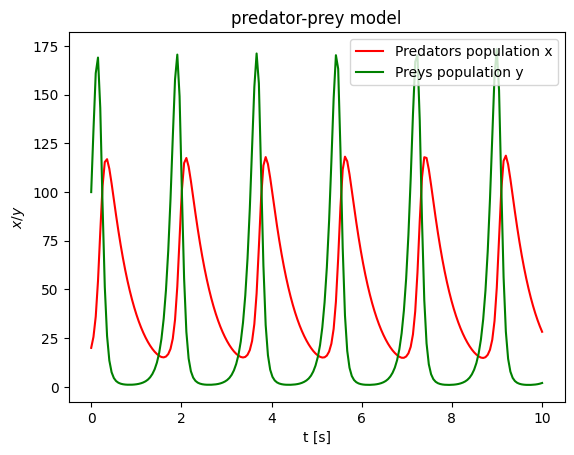

In [11]:
plt.title("predator-prey model")
plt.plot(sol.t, sol.y[0], c='red', label = 'Predators population x')
plt.plot(sol.t, sol.y[1], c='green', label = 'Preys population y')
plt.xlabel("t [s]")
plt.ylabel(r"$x / y$")
plt.legend()
plt.show()

## Zadanie 4.

Zasymulować wahadło magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

#### Rozwiązanie:

$$\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t}  $$
$$\frac{d^2x}{dt^2} = - k \frac{dx}{dt} + b(x-x^3) + a \sin{t} = f(t, x, \frac{dx}{dt}) $$

Wprowadźmy nowe zmienne pomocnicze:

$$ x_1 = x $$
$$ x_2 = x' $$

Otrzymujemy wówczas następujący układ równań:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = f(t, x_1, x_2)
\end{cases}
$$

Dla równania wahadła:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = - k x_2 + b(x_1-x_{1}^{3}) + a \sin{t}
\end{cases}
$$



In [12]:
def magnetic_oscilator(t, r, a, b, k):
    x1, x2 = r
    dx1dt = x2
    dx2dt = -k * x2 + b * ( x1 - x1 ** 3) + a * np.sin(t)
    return np.array([dx1dt, dx2dt], float)

In [13]:
t0, tn = 0, 20
t_span = [t0, tn]
r0 = [0, 4]
t_eval = np.linspace(*t_span, 500)
a, b, k = 1, 1, 1

sol = solve_ivp(magnetic_oscilator, t_span, r0, method = 'RK45', t_eval = t_eval, args = (a, b, k))

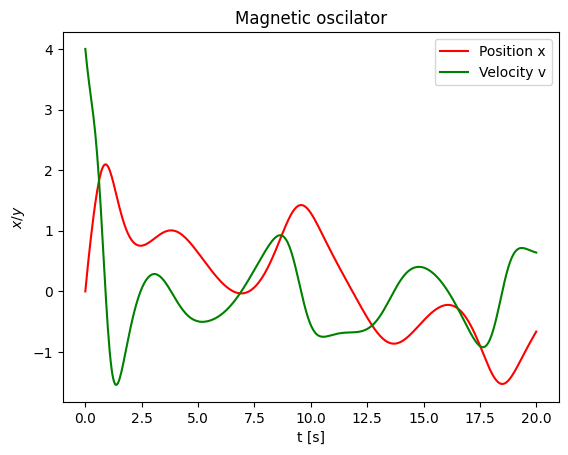

In [14]:
plt.title("Magnetic oscilator")
plt.plot(sol.t, sol.y[0], c='red', label = 'Position x')
plt.plot(sol.t, sol.y[1], c='green', label = 'Velocity v')
plt.xlabel("t [s]")
plt.ylabel(r"$x / y$")
plt.legend()
plt.show()

## Zadanie 5.

Przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
a $\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

- $S$ - osobniki podatne $S(0)> 0$

- $I$ - osobniki chorujące i roznoszące infekcję $I(0)>0$

- $R$- osobniki ozdrowiałe $R(0)=0$.

In [15]:
def sir_model(t, vec, betha, gamma):
    s, i, r = vec
    dsdt = -betha * s * i
    drdt = gamma * i
    didt = -dsdt - drdt
    return np.array([dsdt, didt, drdt], float)

In [16]:
t0, tn = 0, 20
t_span = [t0, tn]
r0 = [1e3, 1, 0]
t_eval = np.linspace(*t_span, 500)
betha, gamma = 0.002, 0.5

sol = solve_ivp(sir_model, t_span, r0, method = 'RK45', t_eval = t_eval, args = (betha, gamma))

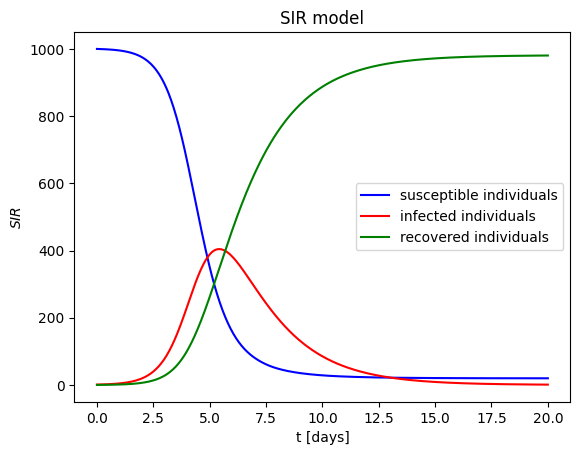

In [17]:
plt.title("SIR model")
plt.plot(sol.t, sol.y[0], c='blue', label = 'susceptible individuals')
plt.plot(sol.t, sol.y[1], c='red', label = 'infected individuals')
plt.plot(sol.t, sol.y[2], c='green', label = 'recovered individuals')
plt.xlabel("t [days]")
plt.ylabel(r"$SIR$")
plt.legend()
plt.show()

## Zadanie 6.

Rozwiązać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiązaniem analitycznym 
$$ u = e^{-\frac{t}{\tau}} $$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

In [18]:
def radioactive_decay(t, u, thau):
    dudt = -u / thau
    return np.array([dudt], float)

In [19]:
t0, tn = 0, 20
t_span = [t0, tn]
r0 = [1]
t_eval = np.linspace(*t_span, 500)
thau = 10

sol = solve_ivp(radioactive_decay, t_span, r0, method = 'RK45', t_eval = t_eval, args = (thau,))

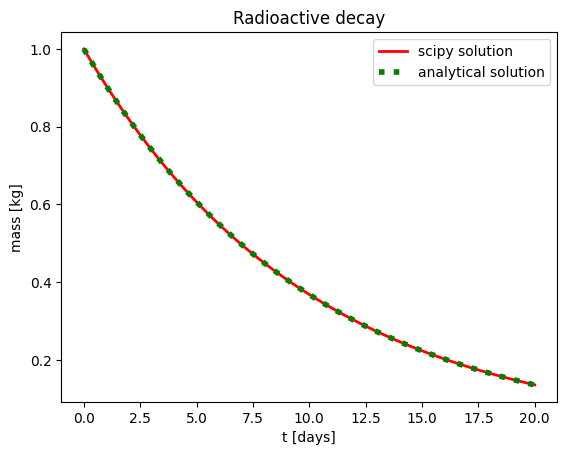

In [20]:
plt.title("Radioactive decay")
plt.plot(sol.t, sol.y[0], c='red', linewidth = 2, label = 'scipy solution')
plt.plot(t_eval, r0[0] * np.exp(-t_eval / thau), c='green', linewidth = 4, linestyle = ':', label = 'analytical solution')
plt.xlabel("t [days]")
plt.ylabel("mass [kg]")
plt.legend()
plt.show()

## Zadanie 7.

Zasymulować drgania sprężyny według równania:
$$m\frac{d^2x}{dt}=-kx $$

#### Rozwiązanie:

$$ \frac{d^2x}{dt}=-\frac{k}{m}x = f(t, x, x') $$

Wprowadźmy nowe zmienne pomocnicze:

$$ x_1 = x $$ 
$$ x_2 = x' $$ 

Otrzymujemy wówczas następujący układ równań:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = f(t, x_1, x_2)
\end{cases}
$$

Dla drgań sprężyny:

$$
\begin{cases}
  x_1' = x_2 \\
  x_2' = -\frac{k}{m}x_1
\end{cases}
$$

In [21]:
def spring_oscilation(t, r, k, m):
    x1, x2 = r
    dx1dt = x2
    dx2dt = -(k / m) * x1
    return np.array([dx1dt, dx2dt], float)

In [22]:
t0, tn = 0, 20
t_span = [t0, tn]
r0 = [0, 3]
t_eval = np.linspace(*t_span, 500)
k = 4
m = 2

sol = solve_ivp(spring_oscilation, t_span, r0, method = 'RK45', t_eval = t_eval, args = (k,m))

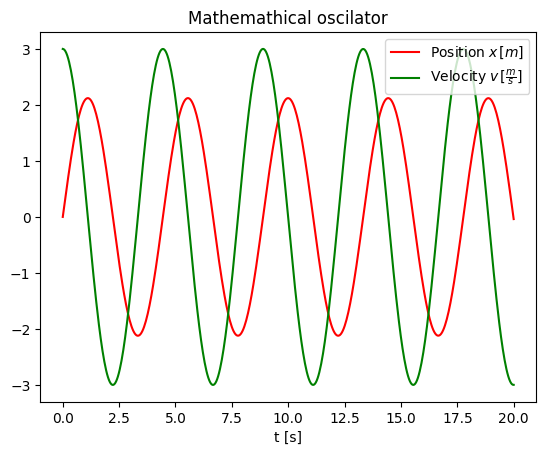

In [23]:
plt.title("Mathemathical oscilator")
plt.plot(sol.t, sol.y[0], c='red', label=r'$ \text{Position} \; x\, [m]$')
plt.plot(sol.t, sol.y[1], c='green', label = r'$ \text{Velocity} \; v \,[\frac{m}{s}] $')
plt.xlabel("t [s]")
plt.legend()
plt.show()